In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from mappings import MIDI_MAP, BW_MAP

In [2]:
# Specify Data 

MINI_SPECIALIZED_MAP = {
    "G3" : "$g^0$",
    "C4" : "$c^1$",
    "F4" : "$f^1$"
}

data_columns = ["Sonaten-Nummer","Durchschnitts-MIDI-Note","Durchschnitts-Note-Null-Referenz","Durchschnitt-Note zwischen"]
data_list = [
            [1, 63.603, 42.603, "D#4/Eb4 und E4"],
            [2, 62.031, 41.031, "D4 und D#4/Eb4"],
            [3, 64.881, 41.881, "E4 und F4"],
            [4, 62.468, 41.468, "D4 und D#4/Eb4"],
            [5, 62.208, 41.208, "D5 und D#4/Eb4"],
            [6, 64.499, 43.499, "E4 und F4"],
            [7, 62.493, 41.493, "D4 und D#4/Eb4"],
            [8, 61.111, 40.111, "C#4/Db4 und D4"],
            [9, 61.260, 40.260, "C#4/Db4 und D4"],
            [10, 65.841, 44.841, "F4 und F#4/Gb4"],
            [11, 60.467, 39.467, "C4 und C#4/Db4"],
            [12, 61.408, 40.408, "C#4/Db4 und D4"],
            [13, 59.320, 38.320, "B3 und C4"],
            [14, 58.348, 37.348, "A#3/Bb3 und B3"],
            [15, 60.957, 39.957, "C4 und C#4/Db4"],
            [16, 60.672, 39.672, "C4 und C#4/Db4"],
            [17, 61.166, 40.166, "C#4/Db4 und D4"],
            [18, 64.559, 43.559, "E4 und F4"],
            [19,68.235, 47.235, "G#4/Ab4 und A4"],
            [20, 66.529, 45.529, "F#4/Gb4 und G4"],
            [21, 62.804, 41.803, "D4 und D#4/Eb4"],
            [22, 62.860, 41.860, "D4 und D#4/Eb4"],
            [23, 61.860, 40.860, "C#4/Db4 und D4"],
            [24, 67.303, 46.303, "G4 und G#4/Ab4"],
            [25, 64.675, 43.675, "E4 und F4"],
            [26, 63.907, 42.907, "D#4/Eb4 und E4"],
            [27, 64.115, 43.115, "E4 und F4"],
            [28, 63.883, 42.883, "D#4/Eb4 und E4"],
            [29, 68.098, 47.098, "G#4/Ab4 und A4"],
            [30, 65.925, 44.923, "F4 und F#4/Gb4"],
            [31, 62.875, 41.875, "D4 und D#4/Eb4"],
            [32, 62.323, 41.323, "D4 und D#4/Eb4"]
            ]

mean_df = pd.DataFrame(data_list, columns = data_columns)
mean_df = mean_df.set_index("Sonaten-Nummer")
mean_df

,Durchschnitts-MIDI-Note,Durchschnitts-Note-Null-Referenz,Durchschnitt-Note zwischen
Sonaten-Nummer,,,
1,63.603,42.603,D#4/Eb4 und E4
2,62.031,41.031,D4 und D#4/Eb4
3,64.881,41.881,E4 und F4
4,62.468,41.468,D4 und D#4/Eb4
5,62.208,41.208,D5 und D#4/Eb4
6,64.499,43.499,E4 und F4
7,62.493,41.493,D4 und D#4/Eb4
8,61.111,40.111,C#4/Db4 und D4
9,61.260,40.260,C#4/Db4 und D4


In [3]:
# Linear regression
# - For all values
# - For first part [0,14]
# - For second part [14,]

lin_reg_all = LinearRegression().fit(mean_df.index.values.reshape(-1, 1), mean_df["Durchschnitts-MIDI-Note"])
lin_reg_part_1 = LinearRegression().fit(mean_df.index.values[:14].reshape(-1, 1), mean_df["Durchschnitts-MIDI-Note"][:14])
lin_reg_part_2 = LinearRegression().fit(mean_df.index.values[13:].reshape(-1, 1), mean_df["Durchschnitts-MIDI-Note"][13:])

x_vals_all = np.linspace(mean_df.index.values[0],mean_df.index.values[-1],len(mean_df.index.values))
y_vals_all = x_vals_all * lin_reg_all.coef_ + lin_reg_all.intercept_
x_vals_part_1 = np.linspace(mean_df.index.values[0],mean_df.index.values[13],len(mean_df.index.values[:14]))
y_vals_part_1 = x_vals_part_1 * lin_reg_part_1.coef_ + lin_reg_part_1.intercept_
x_vals_part_2 = np.linspace(mean_df.index.values[13],mean_df.index.values[-1],len(mean_df.index.values[13:]))
y_vals_part_2 = x_vals_part_2 * lin_reg_part_2.coef_ + lin_reg_part_2.intercept_

<ipython-input-4-bb093efccfb4>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels)
<ipython-input-4-bb093efccfb4>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels)


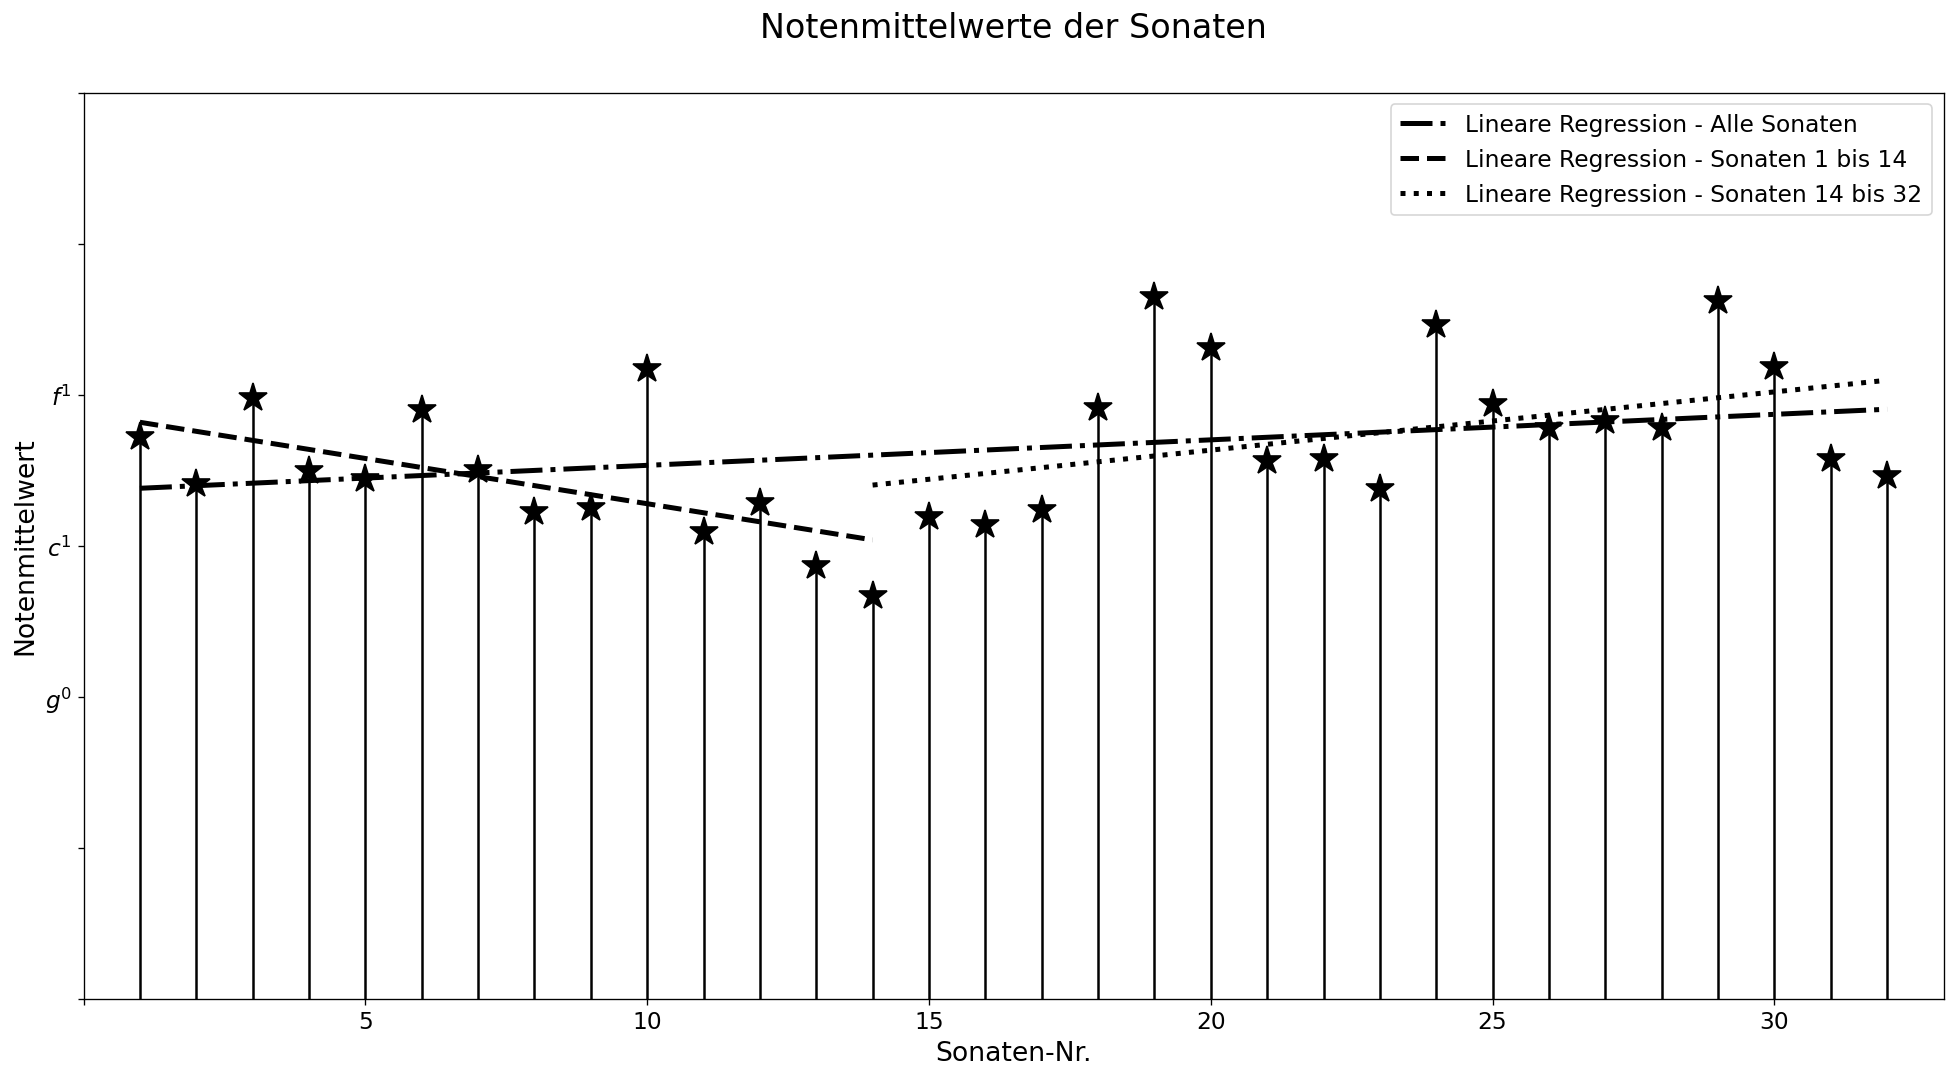

In [4]:
# setup plot 
fig, ax = plt.subplots(1,1, figsize = (20,10), dpi = 120)

# mean plot 
for elem in mean_df.iterrows():
    ax.plot(elem[0],elem[1]["Durchschnitts-MIDI-Note"],"*",markersize = 18, color = "black")
    ax.vlines(elem[0], 0, elem[1]["Durchschnitts-MIDI-Note"], colors="black", linestyles='solid')
    
# set axes limits
ax.set_xlim(0,mean_df.index.values[-1] + 1)
ax.set_ylim(((mean_df["Durchschnitts-MIDI-Note"].min()) // 10 * 10 - 5,(mean_df["Durchschnitts-MIDI-Note"].max()) // 10 * 10 + 15 ))

# plot regression lines
ax.plot(x_vals_all, y_vals_all, color = "black", linestyle = "dashdot", linewidth = 3, label = "Lineare Regression - Alle Sonaten")
ax.plot(x_vals_part_1, y_vals_part_1, color = "black", linestyle = "dashed", linewidth = 3, label = "Lineare Regression - Sonaten 1 bis 14")
ax.plot(x_vals_part_2, y_vals_part_2, color = "black", linestyle = "dotted", linewidth = 3, label = "Lineare Regression - Sonaten 14 bis 32")

# update legend size 
ax.legend(prop={'size': 14})

# update y tick labels 
y_labels = ax.get_yticks().tolist() 
y_labels = [MIDI_MAP[label] for label in y_labels]
y_labels = [MINI_SPECIALIZED_MAP.get(label, "") for label in y_labels]
ax.set_yticklabels(y_labels)

# remove first x tick label 
x_labels = ax.get_xticks().tolist() 
x_labels = [int(label) for label in x_labels]
x_labels[0] = ''
ax.set_xticklabels(x_labels)

# update tick sizes
ax.tick_params(axis='both', which='major', labelsize=14)

# set axis labels 
ax.set_xlabel("Sonaten-Nr.", fontdict={"size":16})
ax.set_ylabel("Notenmittelwert", fontdict={"size":16})

# set title
ax.set_title("Notenmittelwerte der Sonaten", y = 1.05, size = 20)

# save to file
plt.savefig("mittelwerte.png")